In [27]:
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [28]:
data = pd.read_csv('Data/corrected_artDataset.csv')
data.head()

,id_image,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_yearCreation,filename
0,0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque,28500,USD,2021.0,../Art_Price/images/artDataset/image_1.png
1,1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism,3000,USD,NaN,../Art_Price/images/artDataset/image_2.png
2,2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract,5000,USD,2016.0,../Art_Price/images/artDataset/image_3.png
3,3,5.000 USD,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract,5000,USD,2010.0,../Art_Price/images/artDataset/image_4.png
4,4,2.500 USD,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract,2500,USD,2001.0,../Art_Price/images/artDataset/image_5.png


price analyze

In [29]:
data['price'].nunique()

108

In [30]:
data['price_amount'].dtypes

dtype('int64')

In [31]:
data['price_amount'].unique()

array([ 28500,   3000,   5000,   2500,   7575,   7550,   3550,   3075,
        40000,  15000,   7000,   4000,   8000,   5500,   6000,   6500,
        10000,   8500,   2800,  12000,   2000,    900,    800,    700,
         1200,   1000,  30000,  34000,  20000,   7150,   2250,  14000,
        70000,   1895,   3250,   7500,  18000,   1500,  42500,  27500,
        24000,  22500,  42000,   1800,   5995,   3500,   9500,   2200,
       135000,  50000,   4500,  12500,   4375,   3600,  19200,  28000,
        32000,   3680,  13000,   1840,  54000,  25000,   9000,  22000,
        35000,   7960,  45000,  21000,  48000,  11000,  19000,   2700,
        16000,   5100,   1295,   3495,   9995,   3995,   6995,   2995,
         8995,  13500,  17000,   1250,   2550,  23000, 128000, 160000,
        37000,   9350,  14680,  15500,    650,   3895,    995,    595,
         1595,  27000,  75000,   3800,  71500,   8750,    600,    680,
         2600,   1875,   2160,   1275], dtype=int64)

In [32]:
# Grouping data by price_amount and counting the number of titles for each price
title_counts = data.groupby('price_amount')['title'].count().reset_index()
# Renaming the columns for clarity
title_counts.columns = ['price_amount', 'artwork_count']
# Displaying the resulting Series
print(title_counts)

     price_amount  artwork_count
0             595              1
1             600              3
2             650              1
3             680             46
4             700              3
..            ...            ...
103         71500              1
104         75000              1
105        128000              1
106        135000              1
107        160000              1

[108 rows x 2 columns]


In [33]:
title_counts['price_amount'] = title_counts['price_amount'].astype(int)


In [34]:
title_counts.dtypes

price_amount     int32
artwork_count    int64
dtype: object

In [35]:
money = title_counts['price_amount'].value_counts()

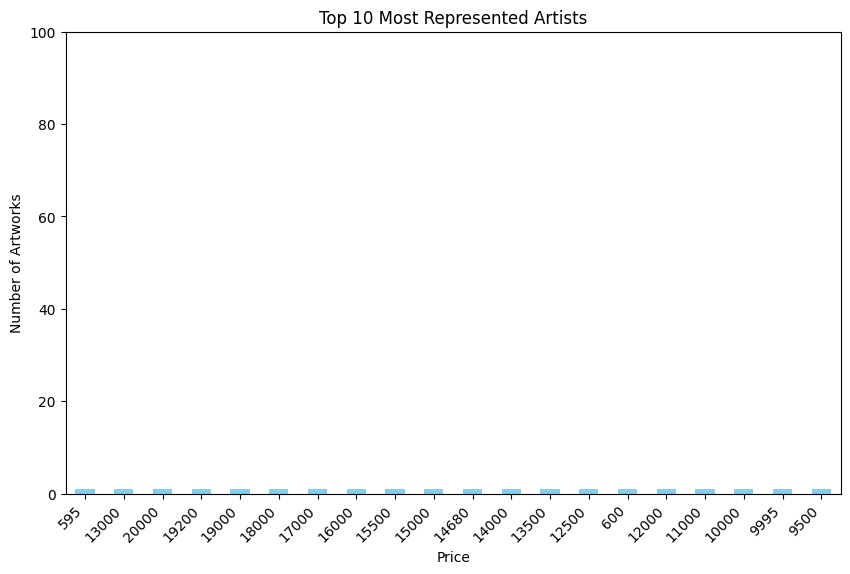

In [36]:
# Visualization of the artists most represented in the dataset.
top_money = money.head(20)


plt.figure(figsize=(10, 6))
top_money.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Represented Artists')
plt.xlabel('Price')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set y-axis limit to 43
plt.show()

<Axes: xlabel='price_amount', ylabel='Count'>

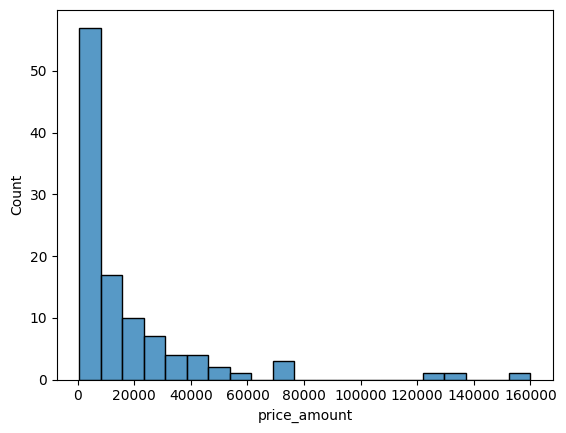

In [37]:
sns.histplot(data=title_counts, x=title_counts['price_amount'])

In [38]:
data['artist'].nunique()

454

# Artists and titles:

In [39]:
# Count the number of works per artist
artist_work_counts = data['artist'].value_counts()
artist_work_counts

artist
Russell Young      17
John Fischer       15
Ruth Bernhard      13
Donald Sultan       9
Grant Hacking       8
                   ..
Sarah Braman        1
Justine Kurland     1
Jennifer Reeves     1
Mike Bidlo          1
John Duff           1
Name: count, Length: 454, dtype: int64

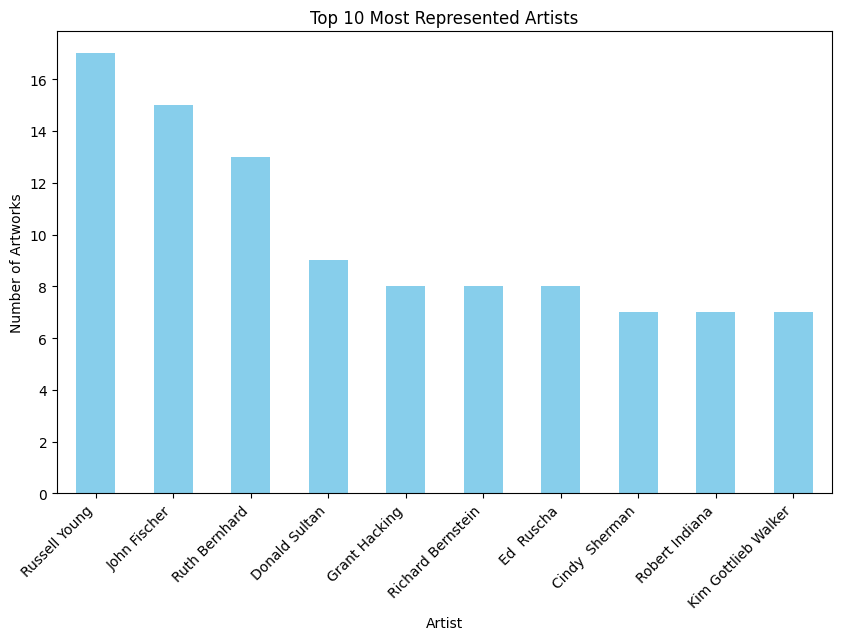

In [40]:
# Visualization of the artists most represented in the dataset.
top_artists = artist_work_counts.head(10)


plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Represented Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# Initialiser une liste pour stocker les artistes avec plus d'une œuvre
artists_with_multiple_works = []
for artist, count in artist_work_counts.items():
    if count > 1: 
        artists_with_multiple_works.append(artist)

for artist in artists_with_multiple_works:
    print(artist)
    

Russell Young
John Fischer
Ruth Bernhard
Donald Sultan
Grant Hacking
Richard Bernstein
Ed  Ruscha
Cindy  Sherman
Robert Indiana
Kim Gottlieb Walker
James A. Fetherolf
Henry Moore
John Baldessari
T.L. Solien
Doris McCarthy
Hossein Edalatkhah
RICHARD WOODS
Irene Mamiye
Dan Walsh
Takashi Murakami
Sterling Ruby
Flip Schulke
Harry Callahan
Jane Kent
Marcia Scanlon
Biff Elrod
Steven Sorman
Mieke Marple
Mary Jo Vath
Mark Fox
Francesco Correggia
Richard Haas
June Redfern
George Platt Lynes
Kate Whiteford
Allison V. Smith
Gustave Blache III
Paige Neuhauser
Stephanie Snider
Gregory Crane
Orly Genger
Mary Frank
Barbara Morgan
Joe Tilson
KAWS
Antonio Frasconi
Frank Schroeder
MICHAEL MAZUR 
Leonardo Drew
Kota Ezawa
Allan  McCollum
Billy Sullivan
Henry Gunderson
Stephen Neil Lorber
Susana Solano
Antonio Carreno
James Siena
Linda Besse
Charles Arnoldi
Christine Wang
Alex Katz
Hayal Pozanti
Alan Herman
Agnieszka  Pilat
George T. Grant
Frances McLaughlin-Gill
Danny Simmons
William Wegman
William Klein


In [42]:
data['movement'].unique()

array(['Baroque', 'Surrealism', 'Abstract', 'Abstract Expressionism',
       'Neo-Expressionism', 'Modernism', 'Minimalism', '[nan]',
       'Punk, Young British Artists, Abstract', 'Magic Realism ',
       'Post-Minimalism', 'Realism', 'Conceptual ', 'Post-Impressionism',
       'Impressionism', 'Expressionism', 'Pop Art', 'Street Art',
       'Nouveau Réalisme', 'Social Realism', 'Neogeo',
       'Environmental Art', 'Geometric Abstraction', 'Feminist Art ',
       'Photorealism', 'Organic/Biomorphic Abstraction',
       'Performance Art', 'Traditional', 'Art Deco', 'Punk', 'Cubism',
       'Art Brut', 'Art Nouveau', 'Romanticism'], dtype=object)

In [43]:
mouvement_counts = data['movement'].value_counts()
mouvement_counts

movement
Realism                                  177
Abstract                                 153
Expressionism                            103
Pop Art                                   88
Conceptual                                73
Surrealism                                21
Impressionism                             20
Geometric Abstraction                     19
Minimalism                                18
Abstract Expressionism                    16
Feminist Art                               7
Traditional                                5
Organic/Biomorphic Abstraction             5
Post-Minimalism                            4
Photorealism                               4
Post-Impressionism                         4
[nan]                                      4
Nouveau Réalisme                           4
Social Realism                             4
Performance Art                            3
Modernism                                  3
Environmental Art                          3
S

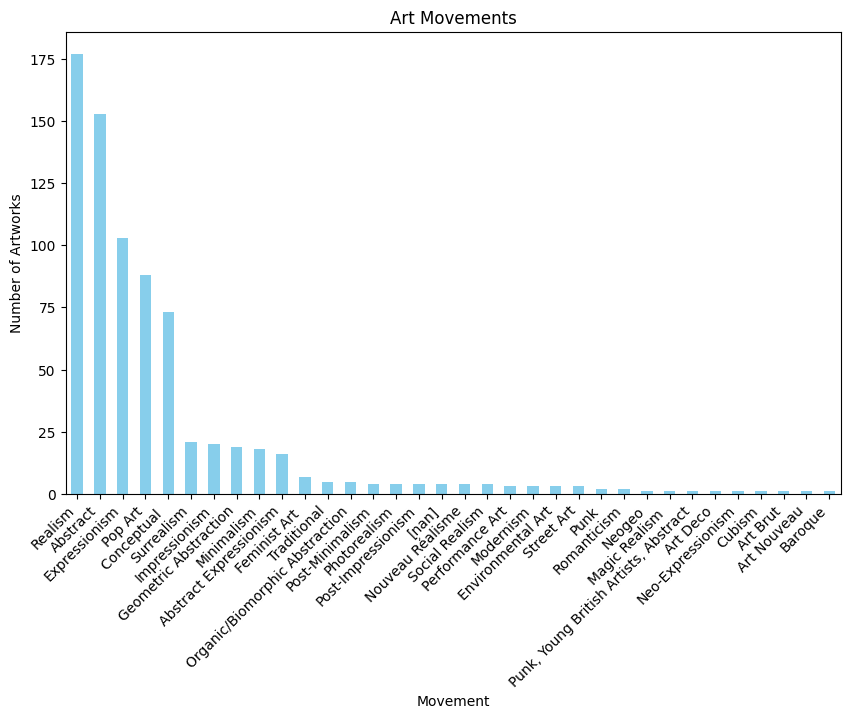

In [44]:
plt.figure(figsize=(10, 6))
mouvement_counts.plot(kind='bar', color='skyblue')
plt.title('Art Movements')
plt.xlabel('Movement')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
# best sold artiste

# Calculer le prix moyen des œuvres pour chaque artiste
artist_prices = data.groupby('artist')['price_amount'].mean().reset_index()

# Trier les artistes en fonction de leur prix moyen (du plus élevé au plus bas)
artist_prices_sorted = artist_prices.sort_values(by='price_amount', ascending=False)

# Afficher les artistes dont les œuvres sont les plus chères
print(artist_prices_sorted.head())

                artist  price_amount
436       Vija Celmins      135000.0
13           Alex Katz       93500.0
259         Larry Bell       71500.0
441  Willem de Kooning       70000.0
389   Roy Lichtenstein       70000.0


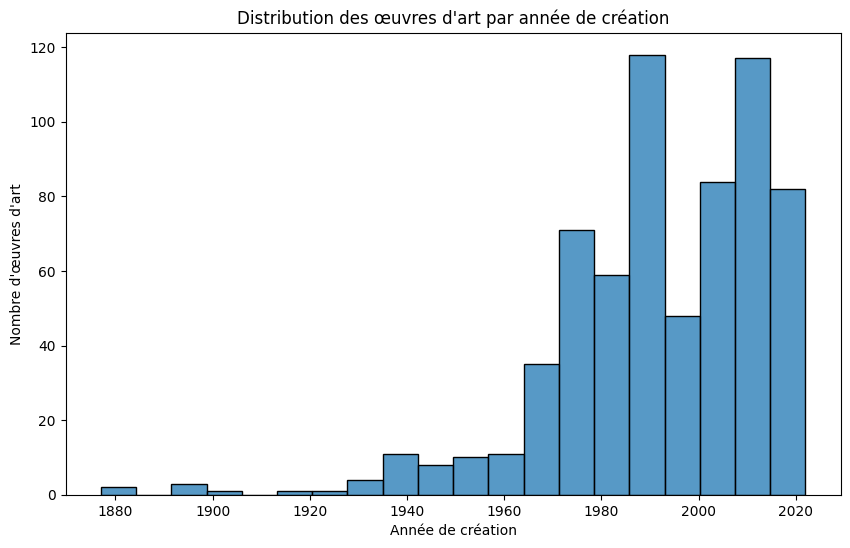

In [46]:
# Distribution des œuvres d'art par année de création (histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(data['clean_yearCreation'], bins=20)
plt.title('Distribution des œuvres d\'art par année de création')
plt.xlabel('Année de création')
plt.ylabel('Nombre d\'œuvres d\'art')

plt.show()

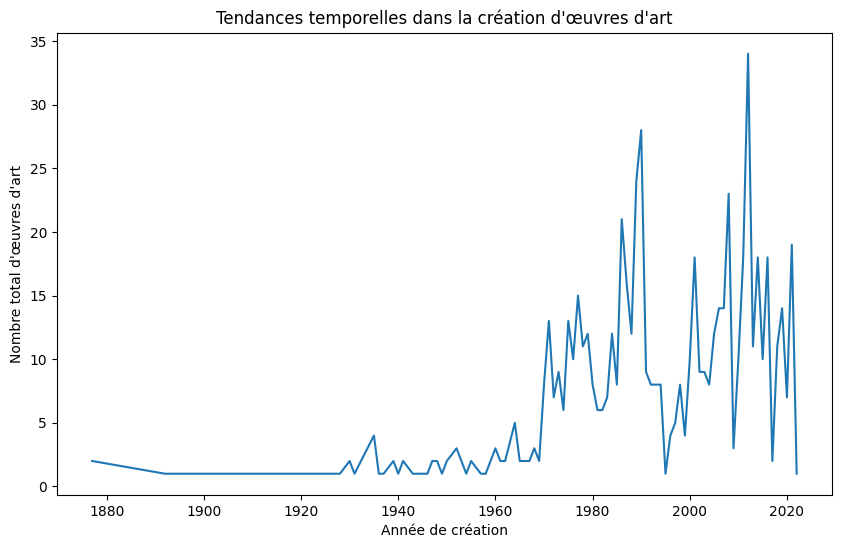

In [47]:
# Tendances temporelles dans la création d'œuvres d'art (graphique linéaire)
plt.figure(figsize=(10, 6))
data.groupby('clean_yearCreation').size().plot(kind='line')
plt.title('Tendances temporelles dans la création d\'œuvres d\'art')
plt.xlabel('Année de création')
plt.ylabel('Nombre total d\'œuvres d\'art')

plt.show()

THE PRICIEST ARTWORK


In [49]:
import pandas as pd



# Sort the dataset based on the 'price_amount' column in descending order
sorted_data = data.sort_values(by='price_amount', ascending=False)

# Retrieve the title and price of the most pricey artwork (the first row after sorting)
most_pricey_artwork_title = sorted_data.iloc[0]['title']
most_pricey_artwork_price = sorted_data.iloc[0]['price_amount']

print("The most pricey artwork is '{}' with a price of {}".format(most_pricey_artwork_title, most_pricey_artwork_price))


The most pricey artwork is 'Black Dress Portfolio' with a price of 160000
